In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session





/kaggle/input/isic-2019-skin-lesion-images-for-classification/ISIC_2019_Training_GroundTruth.csv
/kaggle/input/isic-2019-skin-lesion-images-for-classification/ISIC_2019_Training_Metadata.csv
/kaggle/input/isic-2019-skin-lesion-images-for-classification/MEL/ISIC_0014233_downsampled.jpg
/kaggle/input/isic-2019-skin-lesion-images-for-classification/MEL/ISIC_0056156.jpg
/kaggle/input/isic-2019-skin-lesion-images-for-classification/MEL/ISIC_0066845.jpg
/kaggle/input/isic-2019-skin-lesion-images-for-classification/MEL/ISIC_0054024.jpg
/kaggle/input/isic-2019-skin-lesion-images-for-classification/MEL/ISIC_0070711.jpg
/kaggle/input/isic-2019-skin-lesion-images-for-classification/MEL/ISIC_0064905.jpg
/kaggle/input/isic-2019-skin-lesion-images-for-classification/MEL/ISIC_0028582.jpg
/kaggle/input/isic-2019-skin-lesion-images-for-classification/MEL/ISIC_0027742.jpg
/kaggle/input/isic-2019-skin-lesion-images-for-classification/MEL/ISIC_0067733.jpg
/kaggle/input/isic-2019-skin-lesion-images-for-cla

In [5]:
import pandas as pd

# Load GroundTruth
gt_path = "/kaggle/input/isic-2019-skin-lesion-images-for-classification/ISIC_2019_Training_GroundTruth.csv"
df_gt = pd.read_csv(gt_path)

print("🔹 Shape:", df_gt.shape)
print("🔹 Columns:", df_gt.columns.tolist())

# Sum of each class (how many images belong to each class)
print("\n🔹 Class Distribution:")
print(df_gt.iloc[:, 1:].sum())   # skip first column 'image'


🔹 Shape: (25331, 10)
🔹 Columns: ['image', 'MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK']

🔹 Class Distribution:
MEL      4522.0
NV      12875.0
BCC      3323.0
AK        867.0
BKL      2624.0
DF        239.0
VASC      253.0
SCC       628.0
UNK         0.0
dtype: float64


Metadata shape: (25331, 5)
GroundTruth shape: (25331, 10)
Merged shape: (25331, 14)

🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25331 entries, 0 to 25330
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   image                25331 non-null  object 
 1   age_approx           24894 non-null  float64
 2   anatom_site_general  22700 non-null  object 
 3   lesion_id            23247 non-null  object 
 4   sex                  24947 non-null  object 
 5   MEL                  25331 non-null  float64
 6   NV                   25331 non-null  float64
 7   BCC                  25331 non-null  float64
 8   AK                   25331 non-null  float64
 9   BKL                  25331 non-null  float64
 10  DF                   25331 non-null  float64
 11  VASC                 25331 non-null  float64
 12  SCC                  25331 non-null  float64
 13  UNK                  25331 non-null

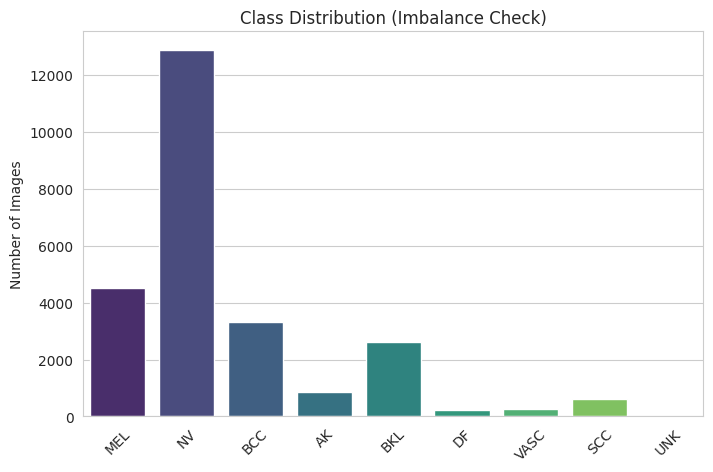

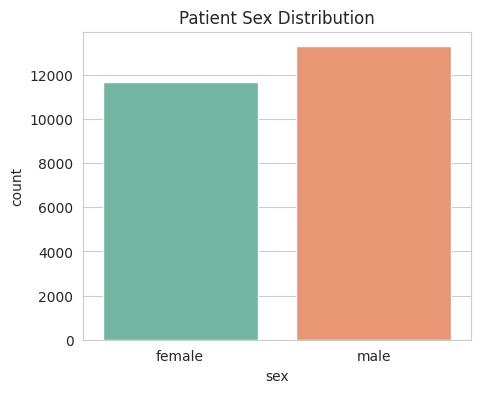

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


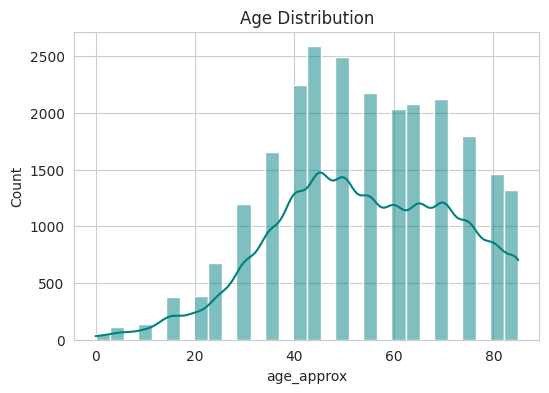

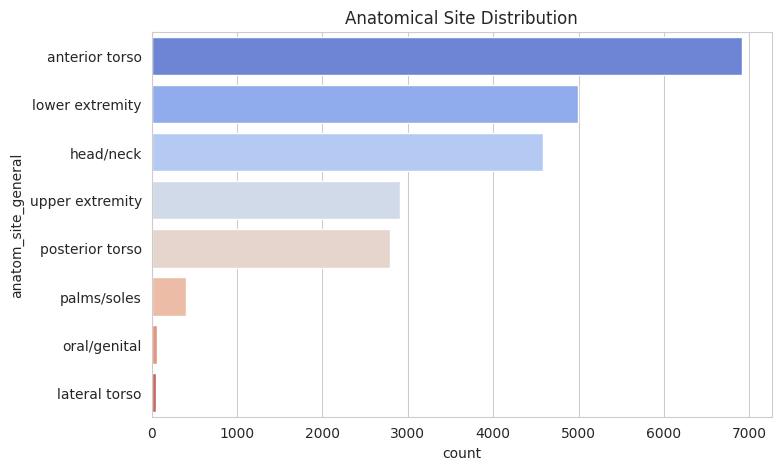

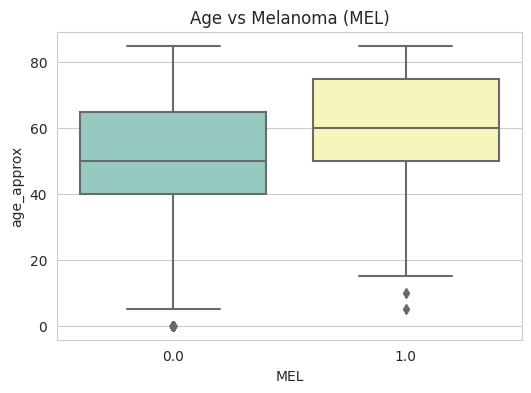

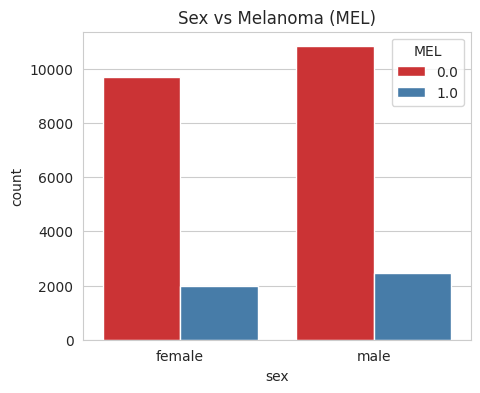

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


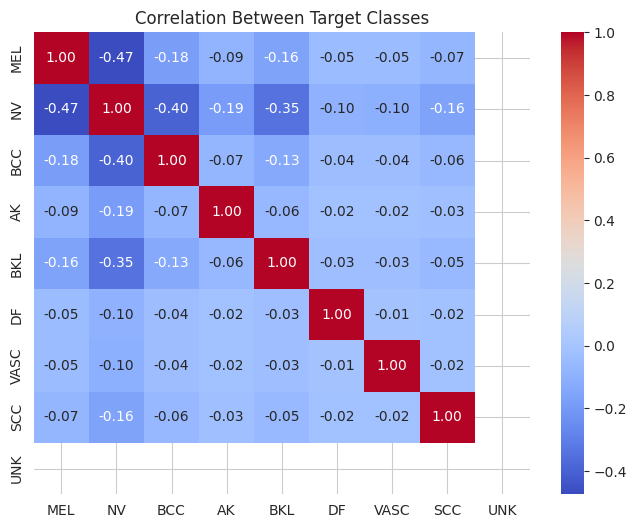

✅ Cleaned dataset saved for modeling!


In [7]:
# ======================================
# 1. Import Libraries
# ======================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Pretty settings
pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")

# ======================================
# 2. Load Data
# ======================================
meta_path = "/kaggle/input/isic-2019-skin-lesion-images-for-classification/ISIC_2019_Training_Metadata.csv"
gt_path   = "/kaggle/input/isic-2019-skin-lesion-images-for-classification/ISIC_2019_Training_GroundTruth.csv"

df_meta = pd.read_csv(meta_path)
df_gt   = pd.read_csv(gt_path)

print("Metadata shape:", df_meta.shape)
print("GroundTruth shape:", df_gt.shape)

# Merge metadata + labels on 'image'
df = df_meta.merge(df_gt, on="image")
print("Merged shape:", df.shape)
df.head()

# ======================================
# 3. Basic Info
# ======================================
print("\n🔹 Dataset Info:")
print(df.info())
print("\n🔹 Missing Values:")
print(df.isnull().sum())

print("\n🔹 Numerical Summary:")
print(df.describe().T)

print("\n🔹 Categorical Summary:")
print(df.describe(include=['object']).T)

# ======================================
# 4. Target Classes (Label Distribution)
# ======================================
# Columns after metadata are labels
label_cols = df_gt.columns[1:]

print("\n🔹 Target Classes:", label_cols.tolist())
print("\n🔹 Class Counts:")
print(df[label_cols].sum().sort_values(ascending=False))

# Bar plot
plt.figure(figsize=(8,5))
sns.barplot(x=df[label_cols].sum().index, y=df[label_cols].sum().values, palette="viridis")
plt.title("Class Distribution (Imbalance Check)")
plt.xticks(rotation=45)
plt.ylabel("Number of Images")
plt.show()

# ======================================
# 5. Patient Demographics
# ======================================
# Sex distribution
plt.figure(figsize=(5,4))
sns.countplot(x="sex", data=df, palette="Set2")
plt.title("Patient Sex Distribution")
plt.show()

# Age distribution
plt.figure(figsize=(6,4))
sns.histplot(df["age_approx"].dropna(), bins=30, kde=True, color="teal")
plt.title("Age Distribution")
plt.show()

# Anatomical site distribution
plt.figure(figsize=(8,5))
sns.countplot(y="anatom_site_general", data=df, order=df["anatom_site_general"].value_counts().index, palette="coolwarm")
plt.title("Anatomical Site Distribution")
plt.show()

# ======================================
# 6. Feature vs Target Analysis
# ======================================
# Example: Age vs Melanoma (MEL)
plt.figure(figsize=(6,4))
sns.boxplot(x="MEL", y="age_approx", data=df, palette="Set3")
plt.title("Age vs Melanoma (MEL)")
plt.show()

# Example: Sex vs Melanoma (MEL)
plt.figure(figsize=(5,4))
sns.countplot(x="sex", hue="MEL", data=df, palette="Set1")
plt.title("Sex vs Melanoma (MEL)")
plt.show()

# ======================================
# 7. Correlation among classes
# ======================================
plt.figure(figsize=(8,6))
sns.heatmap(df[label_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Target Classes")
plt.show()


# ======================================
# 8. Save Cleaned Dataset
# ======================================
df.to_csv("/kaggle/working/ISIC2019_EDA_ready.csv", index=False)
print("✅ Cleaned dataset saved for modeling!")
